In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy.external as sce
import seaborn as sns
import matplotlib as mpl
from matplotlib.pyplot import rc_context
from matplotlib.patches import Patch
import scvelo as scv

In [3]:
rnah=sc.read('rnah.h5')

In [4]:
rnah.uns['log1p']["base"] = None



In [6]:
rnah.obs['diff'] = (
    rnah.obs["pheno"]
    .map(lambda x: {'ActB':'B',
    'prePB':'B',
    'PB':'PBC',
    'PC':'PBC'}.get(x, x))
    .astype("category")
)

In [7]:
rnah.obs['diff']


AAACCCAGTGAC-0    PBC
AAACGCTAGCCG-0    PBC
AAACGCTGTACT-0    hMT
AAAGAACAGCGC-0    PBC
AAAGAACCACCA-0    PBC
                 ... 
TTTGTTGGTGGT-1    PBC
TTTGTTGGTTCA-1    PBC
TTTGTTGTCCTT-1    PBC
TTTGTTGTCTCT-1    PBC
TTTGTTGTCTTG-1    hMT
Name: diff, Length: 5568, dtype: category
Categories (5, object): ['B', 'PBC', 'amb', 'hMT', 'lo']

In [8]:
diff=rnah[(rnah.obs['diff']=='B')|(rnah.obs['diff']=='PBC')]

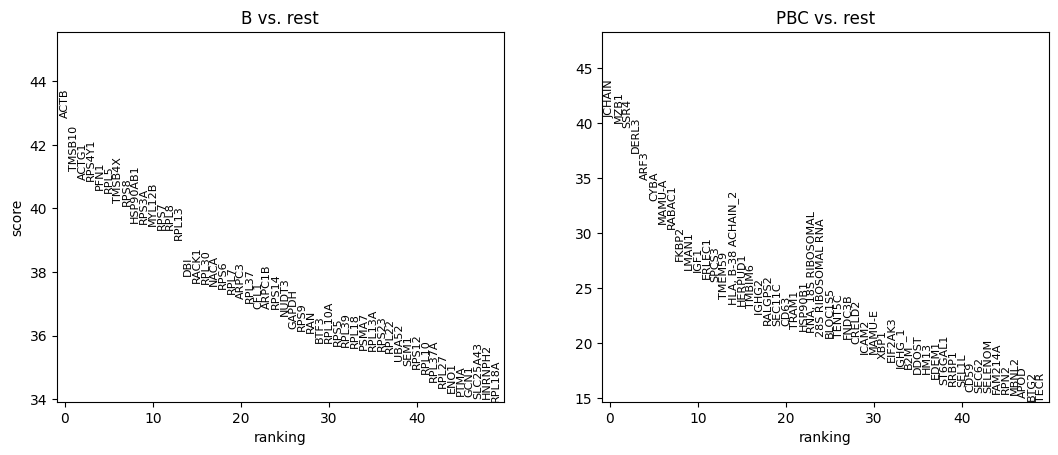

In [9]:
sc.tl.rank_genes_groups(diff, 'diff', method='wilcoxon')
sc.pl.rank_genes_groups(diff, n_genes=50, sharey=False)

In [10]:
pbpc=rnah[(rnah.obs.pheno=='PB')|(rnah.obs.pheno=='PC')]
n633=rnah[rnah.obs.donor=='633']
n669=rnah[rnah.obs.donor=='669']

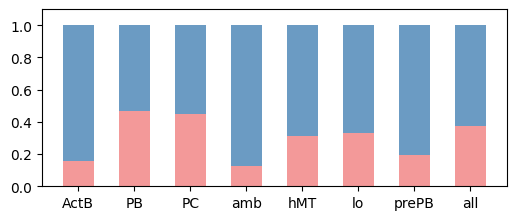

pheno,ActB,PB,PC,amb,hMT,lo,prePB,all
donor,,,,,,,,
633,0.154104,0.469557,0.450359,0.123457,0.315118,0.328571,0.191882,0.376796
669,0.845896,0.530443,0.549641,0.876543,0.684882,0.671429,0.808118,0.623204


In [11]:
d=rnah.obs
dd=d.groupby('pheno')['donor'].value_counts(normalize=True).unstack('pheno')
al=d['donor'].value_counts(normalize=True)
dd['all']= al

labels = dd.columns

donora = dd.iloc[0]
donorb = dd.iloc[1]





fig = plt.figure(figsize=(6,2.3))
ax = fig.add_subplot(111)
width = 0.55       # the width of the bars: can also be len(x) sequence

ax.bar(labels, donora, width,color='lightcoral',alpha=0.8)
ax.bar(labels, donorb, width, bottom=donora,color='steelblue',alpha=0.8)





plt.ylim(0,1.1)

plt.savefig('gbar.pdf')
# plt.legend(loc='upper right')
plt.show()
dd

In [12]:
gpbpc=pbpc[pbpc.obs.phenoclass.str.contains('g')]
mpbpc=pbpc[pbpc.obs.phenoclass.str.contains('m')]

In [13]:
GM=pbpc[(pbpc.obs['class']=='G')|(pbpc.obs['class']=='M')]

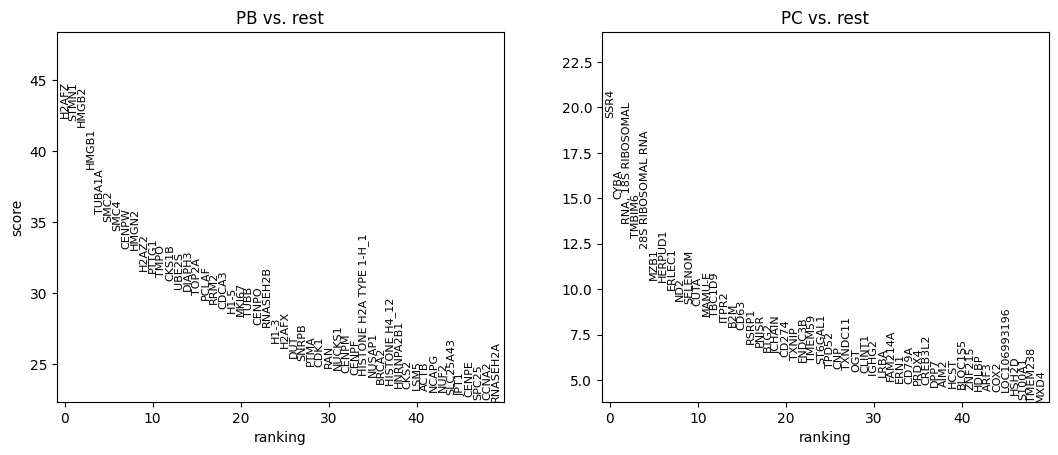

In [14]:
sc.tl.rank_genes_groups(pbpc, 'pheno', method='wilcoxon')
sc.pl.rank_genes_groups(pbpc, n_genes=50, sharey=False)

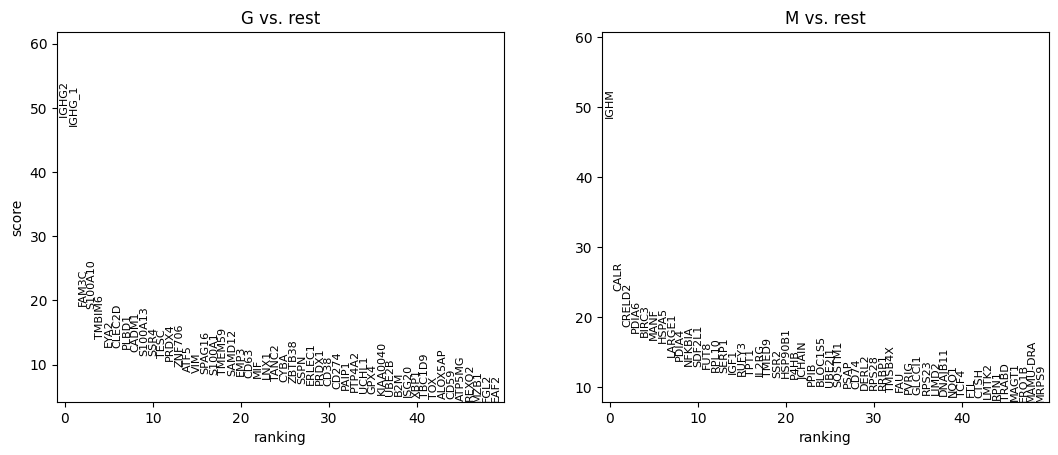

In [15]:
sc.tl.rank_genes_groups(GM, 'class', method='wilcoxon')
sc.pl.rank_genes_groups(GM, n_genes=50, sharey=False)

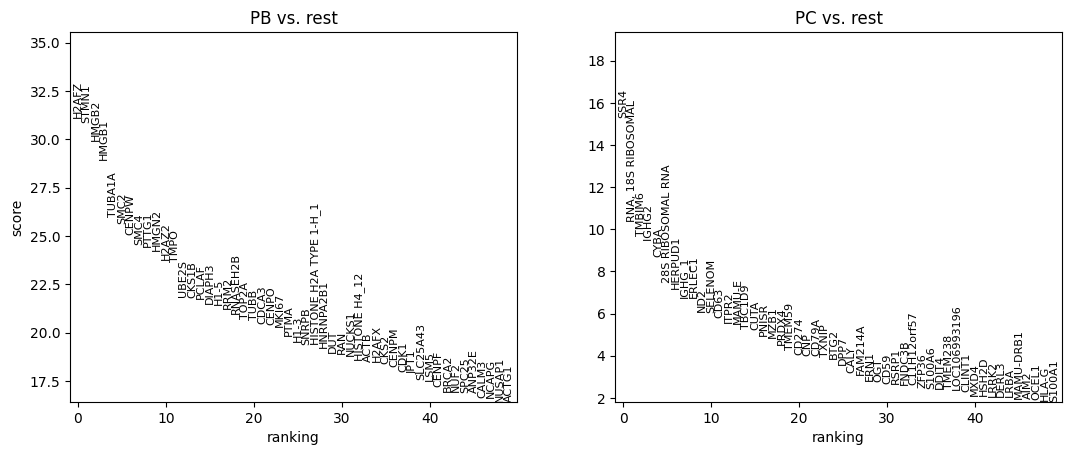

In [16]:
sc.tl.rank_genes_groups(gpbpc, 'pheno', method='wilcoxon')
sc.pl.rank_genes_groups(gpbpc, n_genes=50, sharey=False)

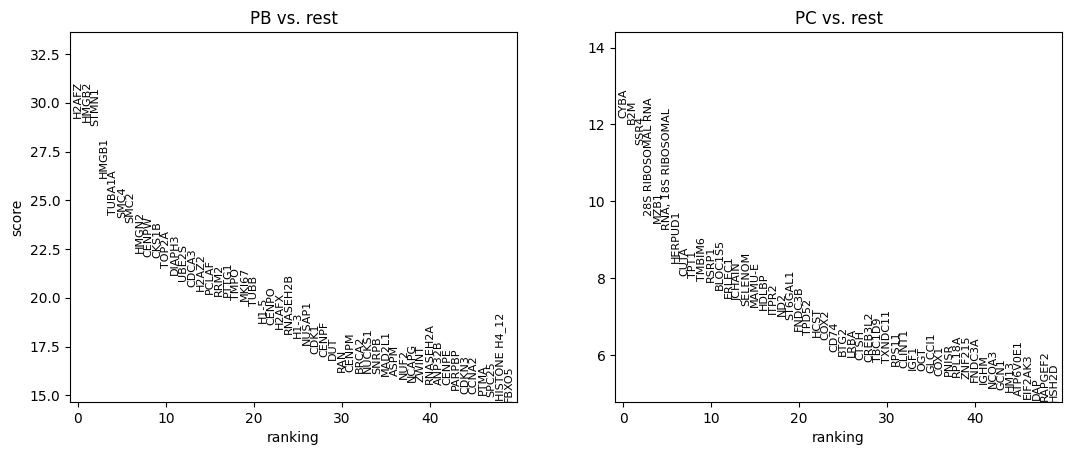

In [17]:
sc.tl.rank_genes_groups(mpbpc, 'pheno', method='wilcoxon')
sc.pl.rank_genes_groups(mpbpc, n_genes=50, sharey=False)

In [18]:
def df_rank_genes_groups(data, group, pval_cutoff : float= None, logfc_cutoff =None):
    df = pd.DataFrame() 
    for k in ['scores', 'names', 'logfoldchanges', 'pvals', 'pvals_adj']: 
        df[k] = data.uns["rank_genes_groups"][k][group] 
    if pval_cutoff is not None: 
        df = df[df["pvals_adj"] < pval_cutoff] 
    if logfc_cutoff is not None: 
        df = df[df["logfoldchanges"].abs() > logfc_cutoff] 


    return df

In [19]:
bpbc=df_rank_genes_groups(diff,'PBC',)
bpbc['-logp']=-np.log10(bpbc['pvals_adj'])





In [20]:
Gpbpc=df_rank_genes_groups(GM,'G',)
Mpbpc=df_rank_genes_groups(GM,'M',)

Gpbpc['-logp']=-np.log10(Gpbpc['pvals_adj'])
Mpbpc['-logp']=-np.log10(Mpbpc['pvals_adj'])





In [710]:
# Gpbpc.to_csv('Gpbpc.csv')
# Mpbpc.to_csv('Mpbpc.csv')

In [24]:
Mpbpconly=pd.read_csv('Mpbpconly.csv')
Gpbpconly=pd.read_csv('Gpbpconly.csv')

(8.0, 78.0)

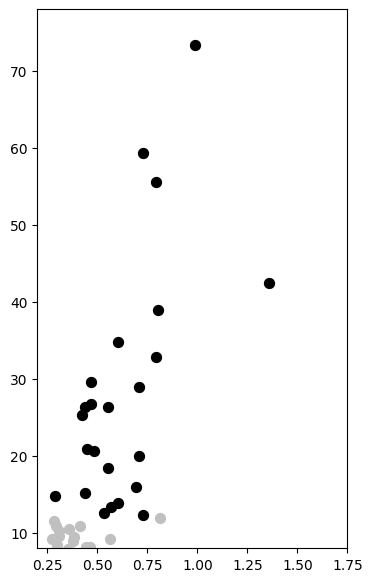

In [25]:
plt.figure(figsize=(4,7))

plt.scatter(x=Mpbpconly['logfoldchanges'],y=Mpbpconly['-logp'],s=50,color='silver')
# plt.scatter(x=pc_ttest[:50]['logfoldchanges'],y=pc_ttest[:50]['-logp'],s=30,color='orange')
plt.scatter(x=Mpbpconly[:25]['logfoldchanges'],y=Mpbpconly[:25]['-logp'],s=50,color='k')
# plt.scatter(x=fold1['logfoldchanges'],y=fold1['-logp'],s=50,color='red')



plt.xlim(0.2,1.75)
plt.ylim(8,78)

(2.0, 82.0)

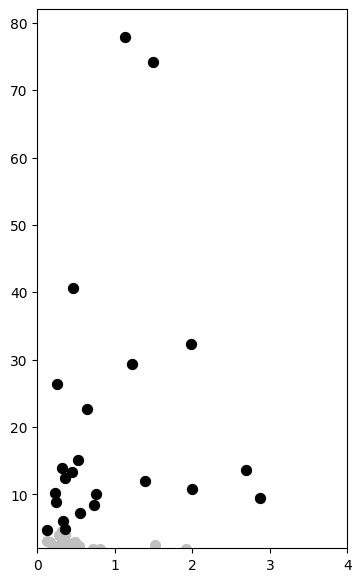

In [26]:
plt.figure(figsize=(4,7))

plt.scatter(x=Gpbpconly['logfoldchanges'],y=Gpbpconly['-logp'],s=50,color='silver')
# plt.scatter(x=pc_ttest[:50]['logfoldchanges'],y=pc_ttest[:50]['-logp'],s=30,color='orange')
plt.scatter(x=Gpbpconly[:25]['logfoldchanges'],y=Gpbpconly[:25]['-logp'],s=50,color='k')
# plt.scatter(x=fold1['logfoldchanges'],y=fold1['-logp'],s=50,color='red')



plt.xlim(0,4)
plt.ylim(2,82)

<!-- #### Gpbpconly[:25].sort_values(by='-logp',ascending=False) -->

In [27]:
Mpbpconly.sort_values(by='-logp',ascending=False)[:26]

,names,scores,logfoldchanges,pvals,pvals_adj,-logp
0,IGHM,48.504295,6.491472,0.000000e+00,0.000000e+00,inf
1,CRELD2,18.640337,0.987773,1.512845e-77,3.931020e-74,73.405495
2,MANF,16.799492,0.728601,2.461437e-63,4.477108e-60,59.349002
3,HSPA5,16.275545,0.792634,1.472047e-59,2.434097e-56,55.613662
4,LARGE1,14.304933,1.356081,2.038361e-46,3.089646e-43,42.510091
5,PDIA4,13.720340,0.805602,7.670479e-43,9.965596e-40,39.001497
6,SDF2L1,12.983329,0.602848,1.521216e-38,1.729338e-35,34.762120
7,FUT8,12.636844,0.793135,1.322573e-36,1.266120e-33,32.897525
8,SERP1,12.016126,0.469074,2.923626e-33,2.417174e-30,29.616692
9,IGF1,11.877278,0.706762,1.553434e-32,1.177309e-29,28.929110


(50.0, 320.0)

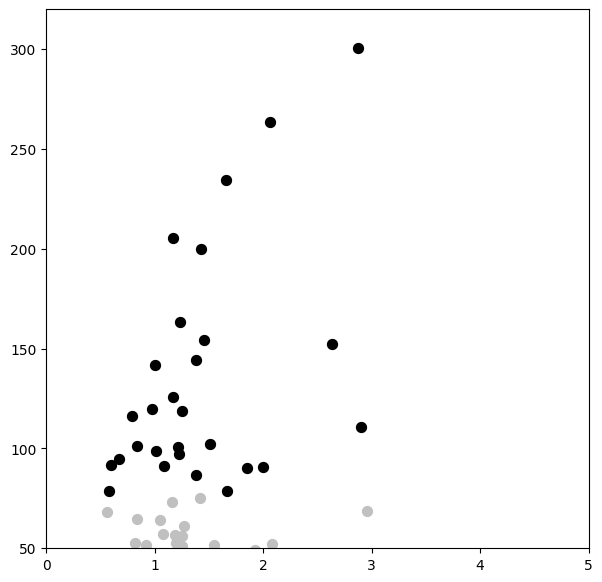

In [28]:
plt.figure(figsize=(7,7))

plt.scatter(x=bpbc['logfoldchanges'],y=bpbc['-logp'],s=50,color='silver')
# plt.scatter(x=pc_ttest[:50]['logfoldchanges'],y=pc_ttest[:50]['-logp'],s=30,color='orange')
plt.scatter(x=bpbc[:31]['logfoldchanges'],y=bpbc[:31]['-logp'],s=50,color='k')
# plt.scatter(x=fold1['logfoldchanges'],y=fold1['-logp'],s=50,color='red')



plt.xlim(0,5)
plt.ylim(50,320)

# plt.xlim(0,1)
# plt.ylim(-1,90)

In [34]:
pc_ttest=df_rank_genes_groups(pbpc,'PC',)
gpc_t=df_rank_genes_groups(gpbpc,'PC',)
mpc_t=df_rank_genes_groups(mpbpc,'PC',)








In [35]:
pc_ttest['-logp']=-np.log10(pc_ttest['pvals_adj'])
gpc_t['-logp']=-np.log10(gpc_t['pvals_adj'])
mpc_t['-logp']=-np.log10(mpc_t['pvals_adj'])



In [36]:
pc_ttest[pc_ttest.names.str.startswith("MAMU")]

,scores,names,logfoldchanges,pvals,pvals_adj,-logp
11,8.517504,MAMU-E,0.196811,1.630294e-17,5.086350e-16,15.293594
60,3.089014,MAMU-DRB1,0.094041,2.008220e-03,1.099895e-02,1.958649
73,2.665649,MAMU-A,0.053268,7.683985e-03,3.618017e-02,1.441529
75,2.591757,MAMU-DMB,0.213056,9.548715e-03,4.378159e-02,1.358708
3043,0.011263,MAMU-DOA,0.260213,9.910134e-01,1.000000e+00,-0.000000
9184,-0.274109,MAMU-F,-0.104280,7.840011e-01,1.000000e+00,-0.000000
9835,-0.419574,MAMU-DRA,0.001209,6.747969e-01,1.000000e+00,-0.000000
10212,-0.532556,MAMU-DPA,-0.028562,5.943412e-01,1.000000e+00,-0.000000
14433,-2.689077,MAMU-DOB,-0.130567,7.164982e-03,3.405379e-02,1.467835


In [683]:
# gpc_t=pd.read_csv('gpc_t.csv')
# mpc_t=pd.read_csv('mpc_t.csv')



In [37]:
pcl=pc_ttest[(pc_ttest.pvals_adj<0.05)&(pc_ttest.logfoldchanges>0)].names
dfl=bpbc[(bpbc.pvals_adj<0.05)&(bpbc.logfoldchanges>0)].names



In [38]:
Gl=Gpbpc[(Gpbpc.pvals_adj<0.05)&(Gpbpc.logfoldchanges>0)].names
Ml=Mpbpc[(Mpbpc.pvals_adj<0.05)&(Mpbpc.logfoldchanges>0)].names




In [39]:
dfl

0       JCHAIN
1         MZB1
2         SSR4
3        DERL3
4         ARF3
        ...   
325       CTSD
326      RUSF1
327    SLC50A1
328    PPP2R5C
329     MGAT4A
Name: names, Length: 330, dtype: object

In [805]:
Mls=set(dfl)&set(Ml)
Gls=set(dfl)&set(Gl)

In [808]:
Gpbpc=Gpbpc.set_index('names')
Mpbpc=Mpbpc.set_index('names')

In [816]:
Gpbpconly=Gpbpc.iloc[Gpbpc.index.isin(Gls)]
Mpbpconly=Mpbpc.iloc[Mpbpc.index.isin(Mls)]

# Gpbpconly.to_csv('Gpbpconly.csv')
# Mpbpconly.to_csv('Mpbpconly.csv')

In [657]:
# gl=gpc_t[(gpc_t.pvals_adj<0.05)&(gpc_t.logfoldchanges>0)].names
# ml=mpc_t[(mpc_t.pvals_adj<0.05)&(mpc_t.logfoldchanges>0)].names

In [689]:
gl=set(gpc_t.dropna()['PBPCup'])
ml=set(mpc_t.dropna()['PBPCup'])

In [690]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline


In [699]:
gl-ml

{'CALY', 'CD59', 'IGHG2 ', 'IGHG_1', 'PRDX4'}

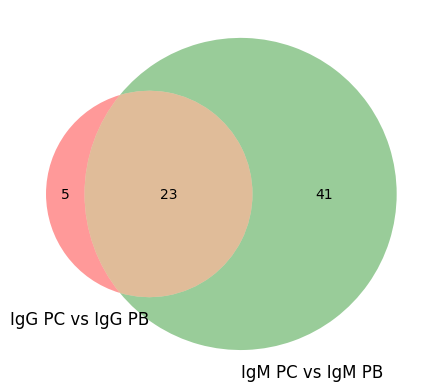

In [692]:
venn2([set(gl),set(ml)],('IgG PC vs IgG PB','IgM PC vs IgM PB') )



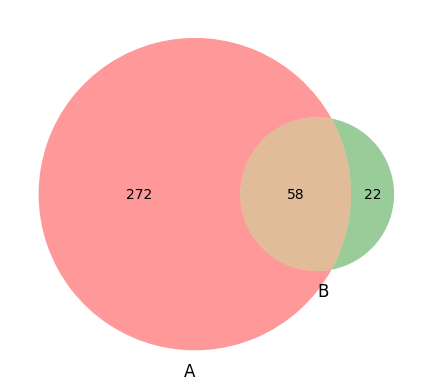

In [133]:
venn2([set(dfl),set(pcl)])



In [698]:
st=str(set(ml)|set(gl))
st=st.replace("'","")
st.replace(",","")

'{GLCCI1 GCN1 FUT8 MBNL2 MAMU-A PRDX4 CYBA CD274 RALGPS2 SCFD2 TNS3 SEC24A FNDC3B LRBA OGT HDLBP DPP7 CALY PSAP CLINT1 CD59 TMED3 RNA 18S RIBOSOMAL SELENOM ITPR2 CD63 ARF3 TMBIM6 SSR4 ZRANB2 FNDC3A SLC39A4 IGF1 TMEM59 CD79A ST6GAL1 ERLEC1 MZB1 BLOC1S5 ERN1 EIF2AK3 CREB3L2 RAPGEF2 HLA B-38 ACHAIN_2 JCHAIN ZNF215 MXD4 MON2 FAM214A HM13 TXNDC11 IGHM BTG2 DAP GMDS APOD B2M 28S RIBOSOMAL RNA HCST RABAC1 TPD52 LOC106993196 TBC1D9 HERPUD1 MAMU-E SEC24D IGHG_1 CNP IGHG2 }'

In [209]:
set(dfl)&set(pcl)

{'28S RIBOSOMAL RNA',
 'AKAP9',
 'ARF3',
 'B2M',
 'BLOC1S5',
 'BTG2',
 'CALY',
 'CD274',
 'CD59',
 'CD63',
 'CD79A',
 'CLINT1',
 'CNP',
 'CREB3L2',
 'CYBA',
 'DERL3',
 'DPP7',
 'EAF2',
 'ERLEC1',
 'ERN1',
 'FAM214A',
 'FNDC3A',
 'FNDC3B',
 'HCST',
 'HDLBP',
 'HERPUD1',
 'HLA, B-38 ACHAIN_2',
 'IGHA1 ',
 'IGHG2 ',
 'IGHG_1',
 'ITPR2',
 'JCHAIN',
 'LOC106993196',
 'LRBA',
 'MAMU-A',
 'MAMU-E',
 'MBNL2',
 'MXD4',
 'MZB1',
 'OGT',
 'PRDX4',
 'RALGPS2',
 'RNA, 18S RIBOSOMAL',
 'S100A10',
 'SEL1L3',
 'SELENOM',
 'SLC39A4',
 'SSR4',
 'ST6GAL1',
 'TBC1D9',
 'TMBIM6',
 'TMEM238',
 'TMEM59',
 'TPD52',
 'TXNDC11',
 'TXNIP',
 'ZFP36',
 'ZNF215'}

In [153]:
sur=pd.read_csv("surfacetome.tsv",sep='\t',)
sur=sur.assign(gene=sur['Gene Names'].str.split(' ')).explode('gene')

surl=list(sur['gene'])

In [155]:
surl

['EPHA2',
 'hCG_24712',
 'NTRK2',
 'hCG_1985371',
 'DRD2',
 'hCG_39593',
 'LDLR',
 'hCG_29965',
 'DDR2',
 'hCG_14697',
 'ACVRL1',
 nan,
 'FSHR',
 nan,
 'EPHA4',
 'hCG_1811889',
 'TGFBR2',
 'hCG_1997782',
 'CD36',
 'hCG_17062',
 'tcag7.257',
 'HTR3E',
 'LILRA5',
 'ILT11',
 'LILRB7',
 'LIR9',
 'CD300LB',
 'CD300B',
 'CLM7',
 'CMRF35A2',
 'IREM3',
 'LMIR5',
 'TREM5',
 'UNQ2530/PRO6029',
 'FBXW7-AS1',
 'DEAR',
 'DEspR',
 'OXTR',
 'hCG_20370',
 'TARM1',
 'ACVR1',
 'hCG_1811747',
 'KLRF2',
 'FZD9',
 'FZD3',
 'GPR25',
 'TLR4',
 'TNFRSF10A',
 'APO2',
 'DR4',
 'TRAILR1',
 'GRM8',
 'GPRC1H',
 'MGLUR8',
 'BMPR1B',
 'F2RL2',
 'PAR3',
 'PGRMC1',
 'HPR6.6',
 'PGRMC',
 'GPR31',
 'CCRL2',
 'CCR11',
 'CCR6',
 'CKRX',
 'CRAM',
 'HCR',
 'CXCR6',
 'BONZO',
 'STRL33',
 'TYMSTR',
 'ACKR2',
 'CCBP2',
 'CCR10',
 'CMKBR9',
 'D6',
 'ADGRB1',
 'BAI1',
 'PTPRT',
 'KIAA0283',
 'TNFRSF10B',
 'DR5',
 'KILLER',
 'TRAILR2',
 'TRICK2',
 'ZTNFR9',
 'UNQ160/PRO186',
 'NRP1',
 'NRP',
 'VEGF165R',
 'TNFSF11',
 'OPGL',
 'RA

In [175]:
set(surl)&(set(pcl)&set(dfl))

{'CD274', 'ITPR2'}

In [301]:
fold1=pc_ttest[:50][pc_ttest['logfoldchanges']>=1]
fold1

,scores,names,logfoldchanges,pvals,pvals_adj,-logp


In [410]:
pc_=pc_ttest[pc_ttest.logfoldchanges!=0]

In [262]:
bpbc=bpbc[bpbc.logfoldchanges!=0]

In [264]:
bpbc.to_csv('bpbc_ex0.csv')

In [411]:
pc_.to_csv('pcpb_ex0.csv')

In [425]:
pc_ttest[:31].sort_values(by='-logp',ascending=False)

,scores,names,logfoldchanges,pvals,pvals_adj,-logp
0,19.45,SSR4,0.48,2.91e-84,7.44e-82,81.13
1,14.98,CYBA,0.50,9.22e-51,1.17e-48,47.93
2,13.58,"RNA, 18S RIBOSOMAL",0.40,4.96e-42,4.72e-40,39.33
3,12.85,TMBIM6,0.39,9.04e-38,7.28e-36,35.14
4,12.21,28S RIBOSOMAL RNA,0.30,2.83e-34,2.00e-32,31.70
5,10.50,MZB1,0.30,8.74e-26,4.55e-24,23.34
6,10.41,HERPUD1,0.40,2.29e-25,1.17e-23,22.93
7,9.97,ERLEC1,0.36,2.06e-23,9.47e-22,21.02
8,9.37,ND2,0.29,7.57e-21,2.91e-19,18.54
9,9.22,SELENOM,0.91,3.08e-20,1.14e-18,17.94


In [352]:
gpc_t[:31].sort_values(by='-logp',ascending=False)

,scores,names,logfoldchanges,pvals,pvals_adj,-logp
0,15.31,SSR4,0.54,6.87e-53,1.98e-50,49.70
1,10.35,"RNA, 18S RIBOSOMAL",0.40,4.17e-25,3.48e-23,22.46
2,9.68,TMBIM6,0.38,3.72e-22,2.57e-20,19.59
3,9.45,IGHG2,0.46,3.41e-21,2.20e-19,18.66
4,8.70,CYBA,0.40,3.21e-18,1.68e-16,15.77
5,7.47,28S RIBOSOMAL RNA,0.24,7.81e-14,2.72e-12,11.57
6,7.20,HERPUD1,0.42,6.22e-13,1.96e-11,10.71
7,6.73,IGHG_1,0.22,1.69e-11,4.65e-10,9.33
8,6.73,ERLEC1,0.32,1.74e-11,4.76e-10,9.32
9,6.09,ND2,0.27,1.10e-09,2.39e-08,7.62


(-1.0, 90.0)

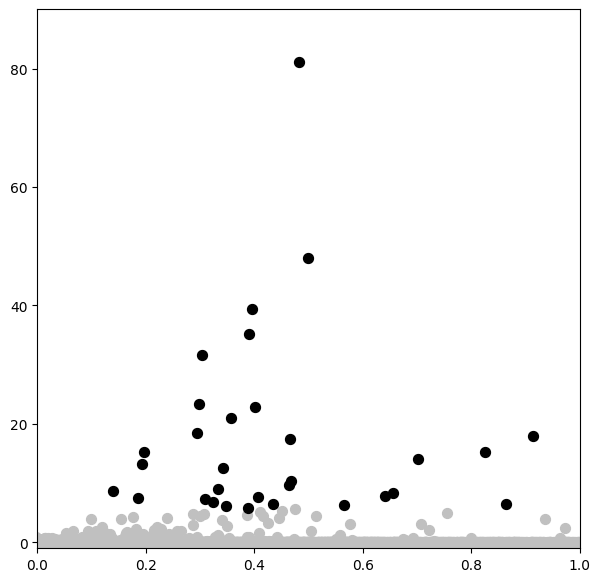

In [353]:
plt.figure(figsize=(7,7))

plt.scatter(x=pc_ttest['logfoldchanges'],y=pc_ttest['-logp'],s=50,color='silver')
# plt.scatter(x=pc_ttest[:50]['logfoldchanges'],y=pc_ttest[:50]['-logp'],s=30,color='orange')
plt.scatter(x=pc_ttest[:31]['logfoldchanges'],y=pc_ttest[:31]['-logp'],s=50,color='k')
# plt.scatter(x=fold1['logfoldchanges'],y=fold1['-logp'],s=50,color='red')



# plt.xlim(-5,5)
# plt.ylim(-5,100)

plt.xlim(0,1)
plt.ylim(-1,90)

(-1.0, 60.0)

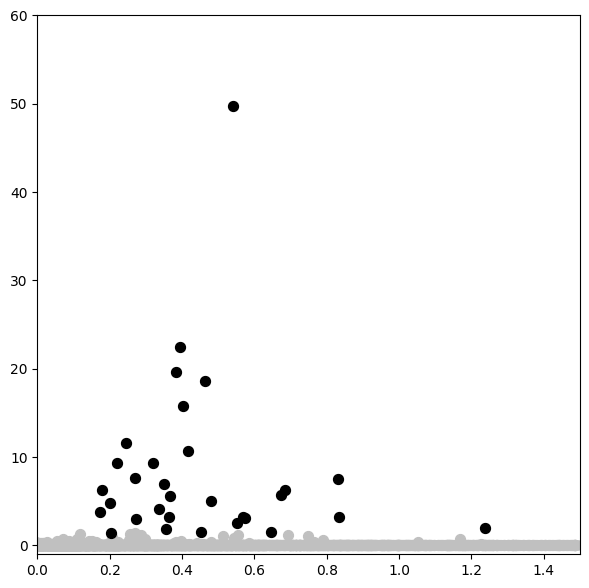

In [367]:
plt.figure(figsize=(7,7))

plt.scatter(x=gpc_t['logfoldchanges'],y=gpc_t['-logp'],s=50,color='silver')
# plt.scatter(x=pc_ttest[:50]['logfoldchanges'],y=pc_ttest[:50]['-logp'],s=30,color='orange')
plt.scatter(x=gpc_t[:31]['logfoldchanges'],y=gpc_t[:31]['-logp'],s=50,color='k')
# plt.scatter(x=fold1['logfoldchanges'],y=fold1['-logp'],s=50,color='red')


# plt.xlim(-5,5)
# plt.ylim(-5,100)




plt.xlim(0,1.5)
plt.ylim(-1,60)

In [366]:
gpc_t[:31].sort_values(by='-logp',ascending=False)

,scores,names,logfoldchanges,pvals,pvals_adj,-logp
0,15.31,SSR4,0.54,6.87e-53,1.98e-50,49.70
1,10.35,"RNA, 18S RIBOSOMAL",0.40,4.17e-25,3.48e-23,22.46
2,9.68,TMBIM6,0.38,3.72e-22,2.57e-20,19.59
3,9.45,IGHG2,0.46,3.41e-21,2.20e-19,18.66
4,8.70,CYBA,0.40,3.21e-18,1.68e-16,15.77
5,7.47,28S RIBOSOMAL RNA,0.24,7.81e-14,2.72e-12,11.57
6,7.20,HERPUD1,0.42,6.22e-13,1.96e-11,10.71
7,6.73,IGHG_1,0.22,1.69e-11,4.65e-10,9.33
8,6.73,ERLEC1,0.32,1.74e-11,4.76e-10,9.32
9,6.09,ND2,0.27,1.10e-09,2.39e-08,7.62


In [371]:
gpc_t[:50]

,scores,names,logfoldchanges,pvals,pvals_adj,-logp
0,15.31,SSR4,0.54,6.87e-53,1.98e-50,49.70
1,10.35,"RNA, 18S RIBOSOMAL",0.40,4.17e-25,3.48e-23,22.46
2,9.68,TMBIM6,0.38,3.72e-22,2.57e-20,19.59
3,9.45,IGHG2,0.46,3.41e-21,2.20e-19,18.66
4,8.70,CYBA,0.40,3.21e-18,1.68e-16,15.77
5,7.47,28S RIBOSOMAL RNA,0.24,7.81e-14,2.72e-12,11.57
6,7.20,HERPUD1,0.42,6.22e-13,1.96e-11,10.71
7,6.73,IGHG_1,0.22,1.69e-11,4.65e-10,9.33
8,6.73,ERLEC1,0.32,1.74e-11,4.76e-10,9.32
9,6.09,ND2,0.27,1.10e-09,2.39e-08,7.62


In [ ]:
plt.figure(figsize=(7,7))

plt.scatter(x=mpc_t['logfoldchanges'],y=mpc_t['-logp'],s=50,color='silver')
# plt.scatter(x=pc_ttest[:50]['logfoldchanges'],y=pc_ttest[:50]['-logp'],s=30,color='orange')
plt.scatter(x=mpc_t[:31]['logfoldchanges'],y=mpc_t[:31]['-logp'],s=50,color='k')
# plt.scatter(x=fold1['logfoldchanges'],y=fold1['-logp'],s=50,color='red')


# plt.xlim(-5,5)
# plt.ylim(-5,100)



plt.xlim(0,1.2)
plt.ylim(-1,35)

In [529]:
marker_genes=['SSR4','CYBA','TMBIM6','CD59']+list(pc_ttest[5:35].names)


In [530]:
marker_genes

['SSR4',
 'CYBA',
 'TMBIM6',
 'CD59',
 'MZB1',
 'HERPUD1',
 'ERLEC1',
 'ND2',
 'SELENOM',
 'CUTA',
 'MAMU-E',
 'TBC1D9',
 'ITPR2',
 'B2M',
 'CD63',
 'RSRP1',
 'PNISR',
 'BTG2',
 'JCHAIN',
 'CD274',
 'TXNIP',
 'FNDC3B',
 'TMEM59',
 'ST6GAL1',
 'TPD52',
 'CNP',
 'TXNDC11',
 'OGT',
 'CLINT1',
 'IGHG2 ',
 'LRBA',
 'FAM214A',
 'ERN1',
 'CD79A']

In [531]:
marker_genes=list(set(marker_genes)-set(['ND2','CUTA','B2M','RSRP1','PNISR','TXNIP','AIM2']))
marker_genes.sort()

In [532]:
marker_genes

['BTG2',
 'CD274',
 'CD59',
 'CD63',
 'CD79A',
 'CLINT1',
 'CNP',
 'CYBA',
 'ERLEC1',
 'ERN1',
 'FAM214A',
 'FNDC3B',
 'HERPUD1',
 'IGHG2 ',
 'ITPR2',
 'JCHAIN',
 'LRBA',
 'MAMU-E',
 'MZB1',
 'OGT',
 'SELENOM',
 'SSR4',
 'ST6GAL1',
 'TBC1D9',
 'TMBIM6',
 'TMEM59',
 'TPD52',
 'TXNDC11']

In [42]:
# sc.pl.dotplot(rnah, marker_genes, 'pheno',cmap='coolwarm', standard_scale='var', 
#               categories_order=['ActB','prePB','PB','PC'])
